# Is Fandango Still Inflating Ratings?
Fandango is a review-aggregation website for movies. This site had been hit with some controvesy regarding the inflation of the ratings of some movies. Data journalist Walt Hickey established that the site had been rounding up the actual ratings of films (for example, 4.1 stars would be rounded up to 4.5 stars). 8% of ratings were also rounded up to the nearest whole star (4.5 to 5.0 stars for example). Fandango officials established that this was caused by a bug in their system but today we'll find out if the ratings are still being inflated.

## Reading in Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
older = pd.read_csv('fandango_score_comparison.csv')
recent = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
older.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
recent.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
older.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [6]:
recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
## Using only columns we need
older_n = older[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
recent_n = recent[['movie', 'year', 'fandango','audience']]

Using these columns, we will compare if there are any differences between the older (tampered) ratings compared to the newer ones from 2016-2017.

older_m contains movies has ratings from different sites such as rotten tomatoes, IMDB, and at least 30 reviews from fans on Fandango.

Whereas recent_n contains 214 of the most popular movies from 2016-2017.

Therefore, the sampling process was not random for the movies.

## Changing approach
since the data was not randomly selected, our new goal should be to compare popular movies from 2015, 2016, and 2017. A film is considered popular if it has over 30 fan ratings on Fandango's website.

In [8]:
older_n['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [9]:
m_2016 = recent_n[(recent_n['year'] == 2016)&(recent_n['audience'] >= 30)]
m_2017 = recent_n[(recent_n['year'] == 2017)&(recent_n['audience'] >= 30)]

In [10]:
## isolating 2016 movies
m_2016['audience'].describe()

count    172.000000
mean      62.250000
std       17.468141
min       30.000000
25%       47.750000
50%       63.000000
75%       77.250000
max       93.000000
Name: audience, dtype: float64

In [11]:
## isolating 2017 movies
m_2017['audience'].describe()

count    19.000000
mean     71.052632
std      16.463676
min      45.000000
25%      54.500000
50%      76.000000
75%      85.500000
max      93.000000
Name: audience, dtype: float64

In [12]:
## isolating 2015 movies
older_n['year'] = older_n['FILM'].str[-5:-1].astype(int)

C:\Users\araf7\AppData\Local\Temp/ipykernel_992/1481475385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  older_n['year'] = older_n['FILM'].str[-5:-1].astype(int)


In [13]:
m_2015 = older_n[older_n['year']==2015]
m_2015['Fandango_votes'].describe()

count      129.000000
mean      3761.891473
std       6543.601748
min         35.000000
25%        210.000000
50%       1415.000000
75%       4045.000000
max      34846.000000
Name: Fandango_votes, dtype: float64

## Comparing Distribution shapes
Now, let's find out the distribution of popular movies per year

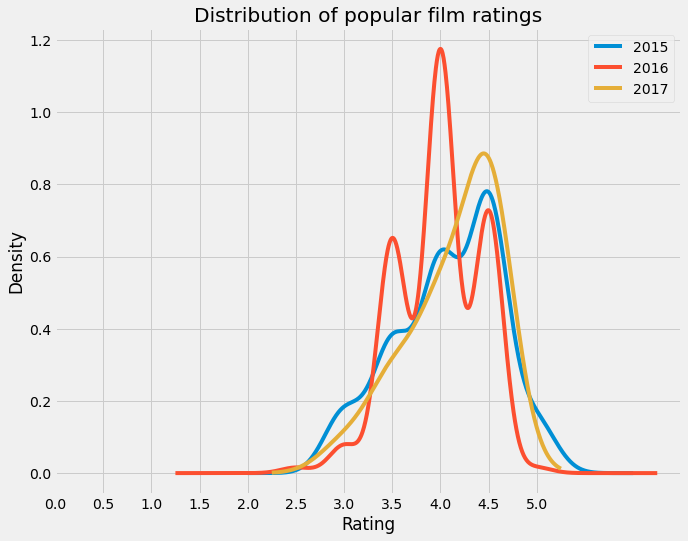

In [14]:
plt.style.use('fivethirtyeight')
m_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(10,8))
m_2016['fandango'].plot.kde(label='2016',legend=True)
m_2017['fandango'].plot.kde(label='2017',legend=True)
plt.legend()
plt.title('Distribution of popular film ratings')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.show()

We can acknowledge that most popular films from 2016 are rated lower than films from 2015. The odd observation is that films from 2017 have a similar shape to 2015 which is slightly left-skewed. This may be due to the films being newer when the data was collected, and less films are from 2017.

All in all, we can see that the films rating from 2015 may have had an increase.

## Analyzing Frequencies

In [19]:
m_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [20]:
m_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     0.581395
3.0     2.906977
3.5    24.418605
4.0    44.186047
4.5    27.325581
5.0     0.581395
Name: fandango, dtype: float64

In [21]:
m_2017['fandango'].value_counts(normalize=True).sort_index()*100

3.0     5.263158
3.5    15.789474
4.0    26.315789
4.5    52.631579
Name: fandango, dtype: float64

###### It is quite clear to see that films are rated higher in 2015 and 2017 compared to 2016. There are more films with a rating of 3.0-3.5  in 2016 compared to 2015/17, and more films with a rating of 4.5-5.0 in 2015/17 compared to 2016.

## Determining the Direction of the Change

In [40]:
mean_2015 = m_2015['Fandango_Stars'].mean()
mean_2016 = m_2016['fandango'].mean()
mean_2017 = m_2017['fandango'].mean()
median_2015 = m_2015['Fandango_Stars'].median()
median_2016 = m_2016['fandango'].median()
median_2017 = m_2017['fandango'].median()
mode_2015 = m_2015['Fandango_Stars'].mode()[0]
mode_2016 = m_2016['fandango'].mode()[0]
mode_2017 = m_2017['fandango'].mode()[0]

In [54]:
stats = pd.DataFrame()
stats['2015'] = [mean_2015,median_2015,mode_2015]
stats['2016'] = [mean_2016,median_2016,mode_2016]
stats['2017'] = [mean_2017,median_2017,mode_2017]
stats.index = ['Mean','Median','Mode']
stats

,2015,2016,2017
Mean,4.085271,3.982558,4.131579
Median,4.000000,4.000000,4.500000
Mode,4.500000,4.000000,4.500000


We can see a clear difference in rating where the 2016 ratings are lower. Let's visualize this.

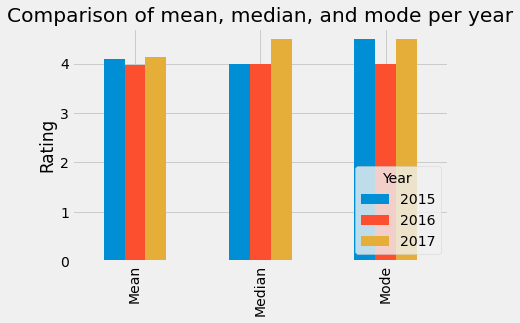

In [77]:
ax = stats.plot.bar(position=0.5)
ax.set_xlabel('')
ax.set_ylabel('Rating')
ax.set_title('Comparison of mean, median, and mode per year')
ax.legend(title='Year',loc='lower right')
plt.show()

It is evident that the dark orange bars are the lowest in almost all of the statistics used. In conclusion we can say that Hickey's analysis and Fandango's response made them fix their system, resulting in lower ratings in 2016. Since this dataset was from March 2017, the movies from that year are rated a bit higher due to minimal films released at that time.